<a href="https://colab.research.google.com/github/bhartikapoor9634/Computer_Vision_Projects/blob/main/Skin_Cancer_Detection_using_CNN_and_VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading dataset from Kaggle

In [ ]:
import os
import zipfile

os.environ['KAGGLE_CONFIG_DIR']="/content/"
!kaggle datasets download jaiahuja/skin-cancer-detection

 99% 777M/786M [00:06<00:00, 130MB/s]
100% 786M/786M [00:06<00:00, 134MB/s]


In [ ]:
!unzip '/content/skin-cancer-detection.zip'

Archive:  /content/skin-cancer-detection.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin c

In [ ]:
image_dir_train = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
image_dir_test= '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img 
from tensorflow.keras.utils import img_to_array 
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.models import Model

Preparing Training and Testing Dataset

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#Preparing Training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir_train,
    labels='inferred',
    label_mode='categorical',
    seed=123,
    #validation_split = 0.2,
    #subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

#Preparing testing set
test_ds= tf.keras.preprocessing.image_dataset_from_directory(
    image_dir_test,
    labels='inferred',
    label_mode='categorical',
    seed=123,
    #validation_split = 0.2,
    #subset='testing',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [ ]:
#printing labels of images
cat = train_ds.class_names
print(cat)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


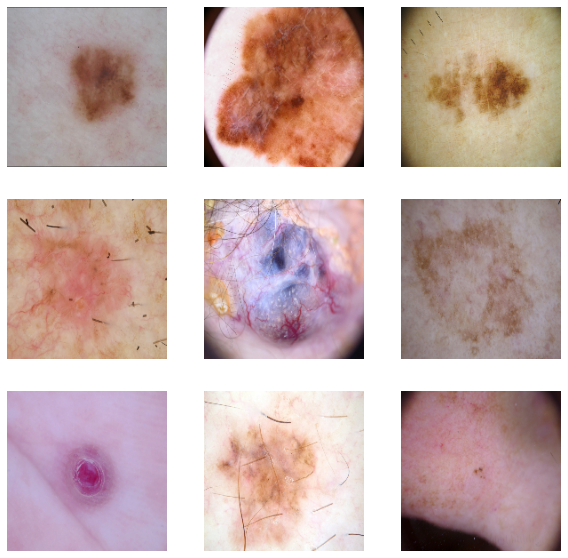

In [ ]:
#Displaying image of each category
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, lbls in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")


Building CNN Sequential Model

In [ ]:
cnn=Sequential()

#Convolutional Layer 1
cnn.add(layers.Conv2D(filters=32, kernel_size=3,padding ='Same',activation = 'relu',input_shape=(img_height, img_width, 3)))
cnn.add(BatchNormalization())
cnn.add(layers.MaxPooling2D(2,2))

#Convolutional Layer 2
cnn.add(layers.Conv2D(filters=32, kernel_size=3,padding ='Same',activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(layers.MaxPooling2D(2,2))

#Fully connected layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(BatchNormalization())

cnn.add(layers.Dense(64, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))

cnn.add(layers.Dense(9, activation ='softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 90, 90, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
#Compiling CNN model
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training the model
cnn_mdl = cnn.fit(x = train_ds, 
                            validation_data=test_ds,
                            epochs=15,
                            shuffle=True)

Epoch 1/15
70/70 [==============================] - 147s 2s/step - loss: 0.0648 - accuracy: 0.9071 - val_loss: 0.4131 - val_accuracy: 0.2712
Epoch 2/15
70/70 [==============================] - 135s 2s/step - loss: 0.0587 - accuracy: 0.9187 - val_loss: 0.4108 - val_accuracy: 0.3051
Epoch 3/15
70/70 [==============================] - 134s 2s/step - loss: 0.0538 - accuracy: 0.9187 - val_loss: 0.5017 - val_accuracy: 0.3559
Epoch 4/15
70/70 [==============================] - 135s 2s/step - loss: 0.0533 - accuracy: 0.9214 - val_loss: 0.5061 - val_accuracy: 0.2797
Epoch 5/15
70/70 [==============================] - 136s 2s/step - loss: 0.0535 - accuracy: 0.9084 - val_loss: 0.4876 - val_accuracy: 0.1864
Epoch 6/15
70/70 [==============================] - 134s 2s/step - loss: 0.0503 - accuracy: 0.9142 - val_loss: 0.5392 - val_accuracy: 0.3475
Epoch 7/15
70/70 [==============================] - 135s 2s/step - loss: 0.0455 - accuracy: 0.9183 - val_loss: 0.4721 - val_accuracy: 0.3475
Epoch 8/15
70

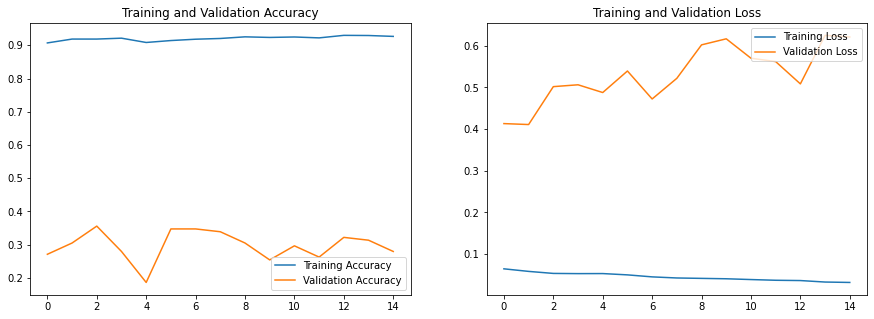

In [ ]:
acc = cnn_mdl.history['accuracy']
val_acc = cnn_mdl.history['val_accuracy']

loss = cnn_mdl.history['loss']
val_loss = cnn_mdl.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Vgg19

In [ ]:
from keras.applications.vgg19 import VGG19
vgg19 = VGG19(include_top = False, input_shape = (180,180,3), weights = 'imagenet')

for layer in vgg19.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(vgg19.output)
predictions = Dense(9, activation='softmax')(x)

model_vgg = Model(inputs = vgg19.input, outputs = predictions)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
model_vgg.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
history_vgg = model_vgg.fit(
      train_ds,
      validation_data=test_ds,
      #steps_per_epoch = 8, 
      epochs=10)

Epoch 1/10
70/70 [==============================] - 1045s 15s/step - loss: 3.9893 - accuracy: 0.1898 - val_loss: 4.2885 - val_accuracy: 0.2203
Epoch 2/10
70/70 [==============================] - 1049s 15s/step - loss: 2.2953 - accuracy: 0.3055 - val_loss: 3.3145 - val_accuracy: 0.2627
Epoch 3/10
70/70 [==============================] - 1169s 17s/step - loss: 1.8802 - accuracy: 0.3761 - val_loss: 3.0625 - val_accuracy: 0.2712
Epoch 4/10
70/70 [==============================] - 987s 14s/step - loss: 1.6379 - accuracy: 0.4314 - val_loss: 2.8939 - val_accuracy: 0.3136
Epoch 5/10
70/70 [==============================] - 980s 14s/step - loss: 1.4889 - accuracy: 0.4685 - val_loss: 2.7035 - val_accuracy: 0.3644
Epoch 6/10
70/70 [==============================] - 977s 14s/step - loss: 1.3778 - accuracy: 0.5002 - val_loss: 2.7484 - val_accuracy: 0.3729
Epoch 7/10
70/70 [==============================] - 987s 14s/step - loss: 1.3017 - accuracy: 0.5275 - val_loss: 2.6380 - val_accuracy: 0.3898
Epo

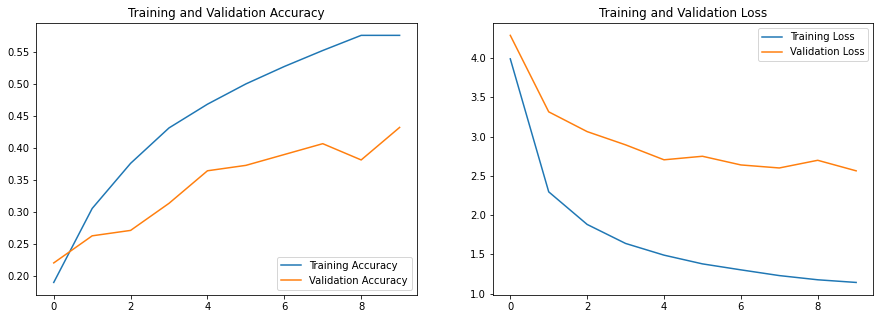

In [ ]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()